In [1]:
# Transcribe

AUDIO_URL = 'https://foodgroup.bandcamp.com/track/universe'
USE_JUKEBOX = True
SEGMENT_START_HINT = 69
SEGMENT_END_HINT = 88
BPM_HINT = 76

import logging

from sheetsage.infer import sheetsage

logging.basicConfig(level=logging.INFO)
lead_sheet, segment_beats, segment_beats_times = sheetsage(
    AUDIO_URL,
    use_jukebox=USE_JUKEBOX,
    segment_start_hint=SEGMENT_START_HINT,
    segment_end_hint=SEGMENT_END_HINT,
    beats_per_minute_hint=BPM_HINT)

INFO:root:FETCHING_AUDIO
INFO:root:Retrieving audio from https://foodgroup.bandcamp.com/track/universe
INFO:root:DETECTING_BEATS
INFO:root:EXTRACTING_FEATURES
INFO:root:Feature extraction w/ Jukebox could take several minutes.
INFO:root:TRANSCRIBING
INFO:root:FORMATTING
INFO:root:DONE


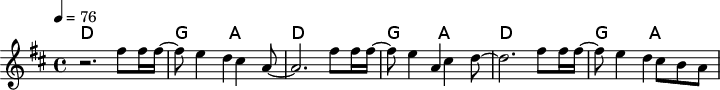

In [2]:
# Display lead sheet

from IPython.display import display, Image

from sheetsage.utils import engrave

lead_sheet_png = engrave(lead_sheet.as_lily())
display(Image(lead_sheet_png))

In [3]:
# Create MIDI

from io import BytesIO
import pretty_midi

from sheetsage.align import create_beat_to_time_fn

beat_to_time_fn = create_beat_to_time_fn(segment_beats, segment_beats_times)
midi_bytes = lead_sheet.as_midi(beat_to_time_fn)
midi = pretty_midi.PrettyMIDI(BytesIO(midi_bytes))

In [5]:
# Synthesize aligned transcription preview

import librosa
from IPython.display import display, Audio

from sheetsage.utils import retrieve_audio_bytes

start_time = beat_to_time_fn(0)
end_time = beat_to_time_fn(lead_sheet[-1] / 4)
audio, sr = librosa.load(
    BytesIO(retrieve_audio_bytes(AUDIO_URL)),
    offset=start_time,
    duration=end_time - start_time,
    mono=True)
preview = midi.fluidsynth(fs=sr)
preview = preview[round(start_time * sr):]
preview = preview[:audio.shape[0]]
display(Audio([audio, preview], rate=sr))